<a href="https://colab.research.google.com/github/SibasisDash/CIFAR-10/blob/master/CIFAR_10_Final_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 - Keras

In the excersises below, we will model a classification task with the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset using [Keras](https://keras.io/).

We will start out with a simle solution and progressively improve upon it.

## 1. Loading the dataset

In [1]:
import tensorflow as tf


In [2]:
import numpy as np
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Five training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


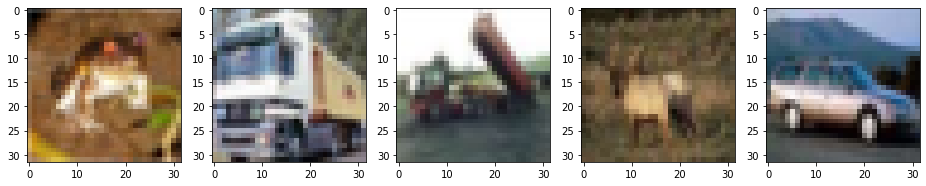

In [5]:


cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Five training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

## 2. CNN classifier

#### Preparing the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


#### Creating CNN model

We will use two convolutional layers, each with 32 filters a kernel size of (3,3) and ReLU activation function.

In [8]:


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

#### Training the CNN

In [9]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/15





 - 20s - loss: 1.5573 - acc: 0.4401 - val_loss: 1.2465 - val_acc: 0.5538
Epoch 2/15
 - 6s - loss: 1.1154 - acc: 0.6040 - val_loss: 1.0862 - val_acc: 0.6152
Epoch 3/15
 - 6s - loss: 0.8817 - acc: 0.6904 - val_loss: 1.0105 - val_acc: 0.6533
Epoch 4/15
 - 6s - loss: 0.6814 - acc: 0.7595 - val_loss: 1.0456 - val_acc: 0.6592
Epoch 5/15
 - 6s - loss: 0.4864 - acc: 0.8291 - val_loss: 1.1828 - val_acc: 0.6557
Epoch 6/15
 - 6s - loss: 0.3204 - acc: 0.8870 - val_loss: 1.3456 - val_acc: 0.6423
Epoch 7/15
 - 6s - loss: 0.2067 - acc: 0.9286 - val_loss: 1.5425 - val_acc: 0.6519
Epoch 8/15
 - 6s - loss: 0.1600 - acc: 0.9447 - val_loss: 1.7796 - val_acc: 0.6320
Epoch 9/15
 - 6s - loss: 0.1261 - acc: 0.9569 - val_loss: 1.8433 - val_acc: 0.6443
Epoch 10/15
 - 6s - loss: 0.1018 - acc: 0.9663 - val_loss: 2.1007 - val_acc: 0.6432
Epoch 11/15
 - 6

In [0]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

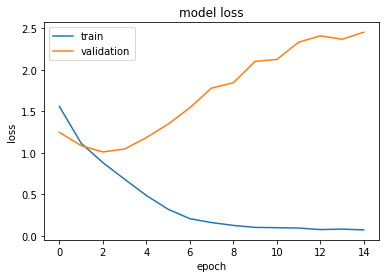

In [11]:
plotLosses(history)

#### Evaluating the CNN

In [0]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [13]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[2.4288908721923828, 0.6421]


## 3. Regularization

### 3.1 Dropout

Dropout
Dropout is a regularization technique patented by Google[1] for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.[2] The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.[3][4]

Dropout: <br>

<img src="1.png" width="500">

<br>

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Training the CNN which now contains dropout layers

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 6s - loss: 1.7019 - acc: 0.3771 - val_loss: 1.3901 - val_acc: 0.5016
Epoch 2/15
 - 6s - loss: 1.3645 - acc: 0.5113 - val_loss: 1.1968 - val_acc: 0.5790
Epoch 3/15
 - 6s - loss: 1.2113 - acc: 0.5664 - val_loss: 1.0985 - val_acc: 0.6131
Epoch 4/15
 - 6s - loss: 1.0967 - acc: 0.6100 - val_loss: 1.0353 - val_acc: 0.6354
Epoch 5/15
 - 6s - loss: 1.0145 - acc: 0.6404 - val_loss: 1.0414 - val_acc: 0.6370
Epoch 6/15
 - 6s - loss: 0.9460 - acc: 0.6648 - val_loss: 1.0007 - val_acc: 0.6517
Epoch 7/15
 - 6s - loss: 0.8837 - acc: 0.6884 - val_loss: 0.9988 - val_acc: 0.6569
Epoch 8/15
 - 6s - loss: 0.8233 - acc: 0.7083 - val_loss: 0.9720 - val_acc: 0.6624
Epoch 9/15
 - 6s - loss: 0.7833 - acc: 0.7226 - val_loss: 0.9826 - val_acc: 0.6705
Epoch 10/15
 - 6s - loss: 0.7412 - acc: 0.7377 - val_loss: 0.9461 - val_acc: 0.6800
Epoch 11/15
 - 6s - loss: 0.6968 - acc: 0.7542 - val_loss: 0.9947 - val_acc: 0.6698
Epoch 12/15
 - 6s - loss: 0.6555 - 

In [0]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

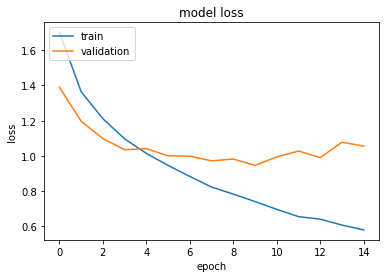

In [17]:
plotLosses(history)

### 3.2 Batch normalization

Batch Normalization works by normalizing layer outputs to a running mean and variance. This speeds up training and improves the final performance of the model. The running statistics are fixed at test time.

While batch normalization works as a regularizer, it also benefits smaller models.

In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 1.5861 - acc: 0.4343 - val_loss: 1.3871 - val_acc: 0.4917
Epoch 2/15
 - 8s - loss: 1.2216 - acc: 0.5655 - val_loss: 1.2299 - val_acc: 0.5681
Epoch 3/15
 - 8s - loss: 1.0841 - acc: 0.6158 - val_loss: 0.9919 - val_acc: 0.6444
Epoch 4/15
 - 8s - loss: 0.9986 - acc: 0.6453 - val_loss: 1.0361 - val_acc: 0.6311
Epoch 5/15
 - 8s - loss: 0.9232 - acc: 0.6739 - val_loss: 0.9778 - val_acc: 0.6571
Epoch 6/15
 - 8s - loss: 0.8758 - acc: 0.6902 - val_loss: 0.8956 - val_acc: 0.6881
Epoch 7/15
 - 8s - loss: 0.8222 - acc: 0.7060 - val_loss: 1.0007 - val_acc: 0.6496
Epoch 8/15
 - 8s - loss: 0.7835 - acc: 0.7228 - val_loss: 1.0340 - val_acc: 0.6428
Epoch 9/15
 - 9s - loss: 0.7481 - acc: 0.7351 - val_loss: 0.8264 - val_acc: 0.7157
Epoch 10/15
 - 8s - loss: 0.7032 - acc: 0.7472 - val_loss: 0.8999 - val_acc: 0.6971
Epoch 11/15
 - 8s - loss: 0.6652 - acc: 0.7634 - val_loss: 0.8426 - val_acc: 0.7075
Epoch 12/15
 - 8s - loss: 0.6428 - 

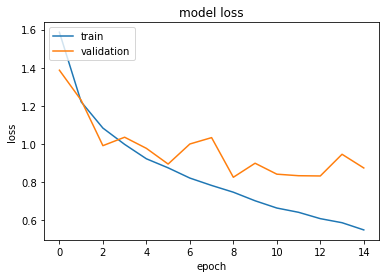

In [20]:
plotLosses(history)

#### Evaluating the CNN (with dropout and batch normalization)

In [0]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [22]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.8685601585388184, 0.7033]


### 3.3 Data Augmentation

In [0]:
train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [25]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[40000:]) / 32,
                    steps_per_epoch=len(X_train[:40000]) / 32,
                    epochs=150,
                    verbose=2)

Epoch 1/150
 - 21s - loss: 1.6247 - acc: 0.4301 - val_loss: 1.3073 - val_acc: 0.5328
Epoch 2/150
 - 20s - loss: 1.2851 - acc: 0.5429 - val_loss: 1.0474 - val_acc: 0.6298
Epoch 3/150
 - 20s - loss: 1.1839 - acc: 0.5791 - val_loss: 1.0374 - val_acc: 0.6379
Epoch 4/150
 - 20s - loss: 1.1372 - acc: 0.5986 - val_loss: 0.9960 - val_acc: 0.6499
Epoch 5/150
 - 20s - loss: 1.1023 - acc: 0.6095 - val_loss: 0.9949 - val_acc: 0.6428
Epoch 6/150
 - 20s - loss: 1.0673 - acc: 0.6256 - val_loss: 1.0803 - val_acc: 0.6175
Epoch 7/150
 - 20s - loss: 1.0490 - acc: 0.6286 - val_loss: 0.8740 - val_acc: 0.6940
Epoch 8/150
 - 20s - loss: 1.0229 - acc: 0.6390 - val_loss: 1.0676 - val_acc: 0.6198
Epoch 9/150
 - 20s - loss: 1.0046 - acc: 0.6468 - val_loss: 0.8642 - val_acc: 0.6979
Epoch 10/150
 - 20s - loss: 0.9929 - acc: 0.6505 - val_loss: 1.0498 - val_acc: 0.6488
Epoch 11/150
 - 20s - loss: 0.9748 - acc: 0.6585 - val_loss: 0.9519 - val_acc: 0.6741
Epoch 12/150
 - 20s - loss: 0.9599 - acc: 0.6665 - val_loss: 0.

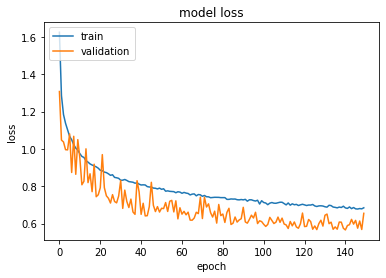

In [26]:
plotLosses(history)

#### Evaluating the CNN (with dropout, batch normalization and data augmentation)

In [0]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [28]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.6678087455749512, 0.7688]


The learning process without image augmentation: <br>

<img src="no_augmentation.png" width="500">

<br>


<br>

The learning process with image augmentation: <br>

<img src="with_augmentation.png" width="500">

<br>
